# Housing Analysis

In [23]:
pip install pywaffle

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 31.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/spanish_houses.csv')
data.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,4,0,0,1,NaN,19147,328868,0.57,0.7,19889.0
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,3,1,0,0,NaN,19147,328868,0.57,0.7,19889.0
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,2,1,1,1,NaN,19147,328868,0.57,0.7,19889.0


## Process data

In [93]:
# Parse numerical columns to float
data['price'] = data['price'].astype(float)
data['m2_real'] = data['m2_real'].astype(float)
data['m2_useful'] = data['m2_useful'].astype(float)

In [3]:
# Remove rows with mismatching values
data = data[data['ad_description']!='ad_description']
data.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,4,0,0,1,NaN,19147,328868,0.57,0.7,19889.0
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,3,1,0,0,NaN,19147,328868,0.57,0.7,19889.0
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,2,1,1,1,NaN,19147,328868,0.57,0.7,19889.0


### Location

In [4]:
# Crear nueva columna 'prov' con lo que aparece después de la coma
data['prov'] = data['loc_zone'].str.split(',').str[-1].str.strip()

In [5]:
top_provincias = data['prov'].value_counts()
print(top_provincias)

prov
Balears (Illes)           24822
Vizcaya                   23075
A Coruña                   8311
Guipúzcoa                  7678
Madrid                     5248
Sevilla                    5076
Albacete                   4454
Álava                      3928
Zamora                     3384
Alicante                   1944
Ciudad Real                1816
Girona                     1808
Segovia                    1526
València                   1401
Soria                      1370
Santa Cruz de Tenerife     1218
Barcelona                   885
Cádiz                       787
Huelva                      657
Tarragona                   219
Valladolid                  210
Name: count, dtype: int64


### House type

In [21]:
print(data['house_type'].value_counts())

house_type
Piso                                       53964
 Casa o chalet independiente               13592
 Casa o chalet                              6868
 Chalet adosado                             6441
Ático                                       3345
 Casa de pueblo                             3001
Dúplex                                      2577
 Chalet pareado                             2482
 Finca rústica                              2276
Alquiler de Piso                            2244
 Casa rural                                  963
Estudio                                      692
Casa rural                                   601
 Caserón                                     161
Alquiler de Ático                            101
 Masía                                       100
Alquiler de Dúplex                            72
 Casa terrera                                 69
Alquiler de Casa o chalet independiente       61
Alquiler de Chalet adosado                    54
 Cortijo 

In [22]:
def agrupar_house_type(ht):
    ht = ht.lower().strip()
    ht = ht.replace('alquiler de ', '')  # quitar "alquiler de"
    
    if any(x in ht for x in ['piso', 'ático', 'dúplex', 'estudio']):
        return 'Piso / Ático'
    elif any(x in ht for x in ['chalet', 'casa', 'casa de pueblo', 'caserón', 'terrera']):
        return 'Casa / Chalet'
    elif any(x in ht for x in ['rural', 'finca', 'masía', 'cortijo']):
        return 'Casa rural / rústica'
    elif any(x in ht for x in ['palacio', 'torre', 'castillo']):
        return 'Vivienda singular'
    else:
        return 'Otro'

# Aplicar al DataFrame
data['house_category'] = data['house_type'].apply(agrupar_house_type)

# Ver distribución
print(data['house_category'].value_counts())

house_category
Piso / Ático            63018
Casa / Chalet           34345
Casa rural / rústica     2410
Vivienda singular          44
Name: count, dtype: int64


In [87]:
from matplotlib.cm import get_cmap
from pywaffle import Waffle
import matplotlib.pyplot as plt
import os

def plot_and_save_waffles_all_provinces(df, output_dir='waffle_plots'):
    # Crear carpeta si no existe
    os.makedirs(output_dir, exist_ok=True)

    provincias = df['prov'].dropna().unique()

    for provincia in provincias:
        subset = df[df['prov'] == provincia]

        # Contar categorías
        counts = subset['house_category'].value_counts()
        total = counts.sum()
        if total == 0:
            continue  # Evitar errores con provincias vacías

        data_percent = (counts / total * 100).round().astype(int)
        diff = 100 - data_percent.sum()
        if diff != 0:
            data_percent[data_percent.idxmax()] += diff

        data = {cat: val for cat, val in data_percent.items()}
        cmap = get_cmap('Set2')
        colors = [cmap(i % 4) for i in range(len(data))]  # Evitar overflow

        fig = plt.figure(
            FigureClass=Waffle,
            rows=10,
            values=data,
            colors=colors,
            title={
                'label': '',
                'loc': 'center',
                'fontsize': 14
            },
            legend={
                'loc': 'lower left',
                'bbox_to_anchor': (0, -0.35),
                'fontsize': 9,
                'ncol': 2
            },
            figsize=(10, 6)
        )

        # Guardar gráfico
        filename = provincia.replace(" ", "_").replace("/", "-").lower() + ".png"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, dpi=300, bbox_inches='tight', transparent=True)
        plt.close(fig)

    print(f"✅ Waffle plots guardados en la carpeta: '{output_dir}'")

In [89]:
plot_and_save_waffles_all_provinces(data)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/2654665896.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/2654665896.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/2654665896.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/fo

✅ Waffle plots guardados en la carpeta: 'waffle_plots'


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/2654665896.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/2654665896.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/2654665896.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')


In [73]:
from matplotlib.cm import get_cmap
from pywaffle import Waffle
import matplotlib.pyplot as plt
import os

def plot_waffle_all_provinces(df, output_path='waffle_all_provinces.png'):
    # Agrupar y contar por provincia y categoría
    grouped = df.groupby(['prov', 'house_category']).size().reset_index(name='count')
    
    # Total de entradas por provincia
    total_by_prov = grouped.groupby('prov')['count'].sum()

    # Calcular proporción de cada categoría por provincia
    grouped['prov_total'] = grouped['prov'].map(total_by_prov)
    grouped['percent'] = (grouped['count'] / grouped['prov_total']) * 100

    # Sumamos porcentajes por categoría en todas las provincias
    combined = grouped.groupby('house_category')['percent'].sum().round().astype(int)

    # Ajustar para que sumen exactamente 100
    diff = 100 - combined.sum()
    if diff != 0:
        combined[combined.idxmax()] += diff

    data = dict(combined)

    cmap = get_cmap('Set2')
    colors = [cmap(i % 8) for i in range(len(data))]

    fig = plt.figure(
        FigureClass=Waffle,
        rows=10,
        values=data,
        colors=colors,
        title={
            'label': 'Distribución total por categoría de vivienda en todas las provincias',
            'loc': 'center',
            'fontsize': 14
        },
        legend={
            'loc': 'lower left',
            'bbox_to_anchor': (0, -0.35),
            'fontsize': 9,
            'ncol': 2
        },
        figsize=(10, 6)
    )

    plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
    plt.close(fig)
    print(f"✅ Waffle plot combinado guardado en: '{output_path}'")


In [74]:
plot_waffle_all_provinces(data)


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/3019720575.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')


✅ Waffle plot combinado guardado en: 'waffle_all_provinces.png'


## Visualization

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/1415846653.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


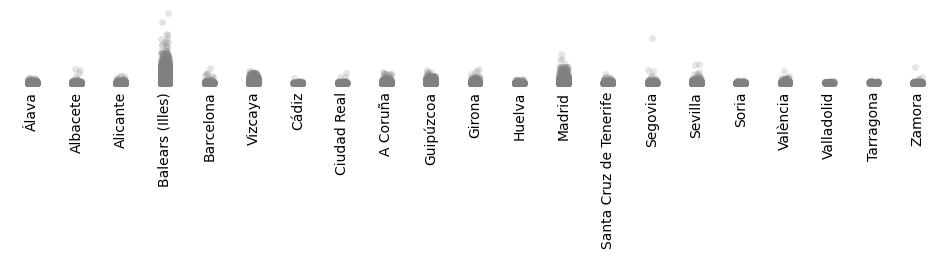

In [105]:
plt.figure(figsize=(12, 1))
sns.stripplot(data=data, x='prov', y='price', jitter=True, color="grey", alpha=0.2)

# Quitar todos los spines (bordes)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Quitar ticks y etiquetas del eje Y
plt.yticks([])
plt.ylabel('')

# Quitar ticks del eje X, pero dejar las etiquetas de provincia
plt.tick_params(axis='x', which='both', length=0)

# Quitar título y eje X
plt.title('')
plt.xlabel('')

plt.xticks(rotation=90)
plt.tight_layout()

# Guardar imagen con fondo transparente
plt.savefig("images/precios_por_provincia.png", dpi=300, transparent=True)

plt.show()

In [94]:
data['price_per_m2'] = data['price'] / data['m2_real']

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_38617/2553781364.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


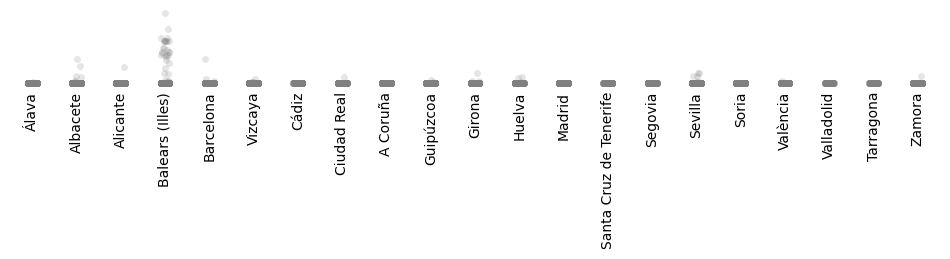

In [108]:
plt.figure(figsize=(12, 1))
sns.stripplot(data=data, x='prov', y='price_per_m2', jitter=True, color="grey", alpha=0.2)

# Quitar todos los spines (bordes)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Quitar ticks y etiquetas del eje Y
plt.yticks([])
plt.ylabel('')

# Quitar ticks del eje X, pero dejar las etiquetas de provincia
plt.tick_params(axis='x', which='both', length=0)

# Quitar título y eje X
plt.title('')
plt.xlabel('')

plt.xticks(rotation=90)
plt.tight_layout()

# Guardar imagen con fondo transparente
plt.savefig("images/precios_por_provincia.png", dpi=300, transparent=True)

plt.show()